In [13]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skopt import plots
sns.set(color_codes=True, font_scale=1.2)

sys.path.append('../../../src')
import raybay

In [3]:
# Load treatment plan results
result = np.load('res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)

In [4]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res_linear_quadratic_gp_minimize.pkl', 'wb'))

In [5]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [6]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,1560,18.52,NaN,1
1,Bronchus,MaxDose,3480,0.00,NaN,1
2,Chestwall_L,MaxDvh,3000,2.04,NaN,1
3,D2cm,MaxDose,"[0,2400]",0.00,NaN,1
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [8]:
# Clinical goal results
idx_sol = np.argmin(result.opt_result.func_vals)
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][idx_sol]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,Bronchus,MaxDvh,1560.0,900.300548,-4.228843e+01
1,Bronchus,MaxDose,3480.0,1986.597656,-4.291386e+01
2,Chestwall_L,MaxDvh,3000.0,1685.963030,-4.380123e+01
3,D2cm,MaxDose,2400.0,2408.937012,3.723755e-01
4,Esophagus,MaxDvh,1880.0,606.308677,-6.774954e+01
5,Esophagus,MaxDose,3000.0,1075.230103,-6.415900e+01
6,GreatVes,MaxDvh,4300.0,1087.253645,-7.471503e+01
7,GreatVes,MaxDose,4900.0,1542.085571,-6.852887e+01
8,Heart,MaxDvh,2800.0,825.511562,-7.051744e+01
9,Heart,MaxDose,3400.0,1513.183472,-5.549460e+01


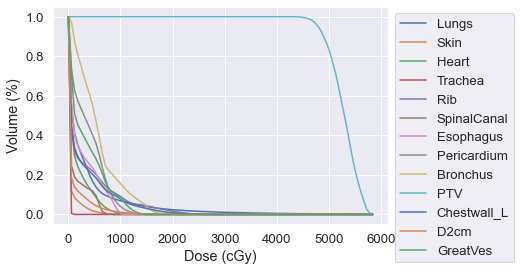

In [9]:
# Dose-volume histograms
result.dvhplot()

In [12]:
# Utility function values
lin = result.get_utility('linear')[idx_sol]
lin_quad = result.get_utility('linear_quadratic')[idx_sol]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 1265.69, Linear-Quadratic: 1265.55


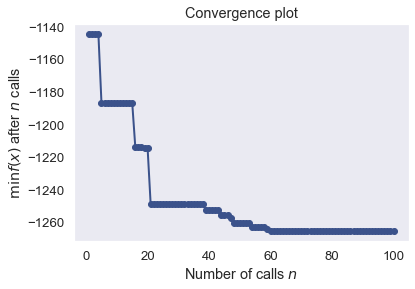

In [20]:
# Convergence
plots.plot_convergence(result.opt_result);

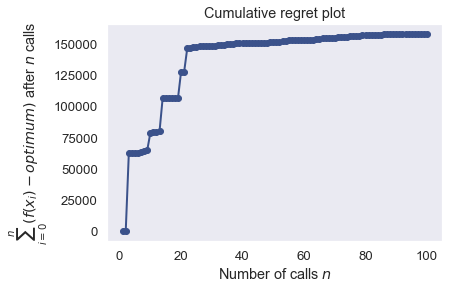

In [21]:
# Regret
plots.plot_regret(result.opt_result);

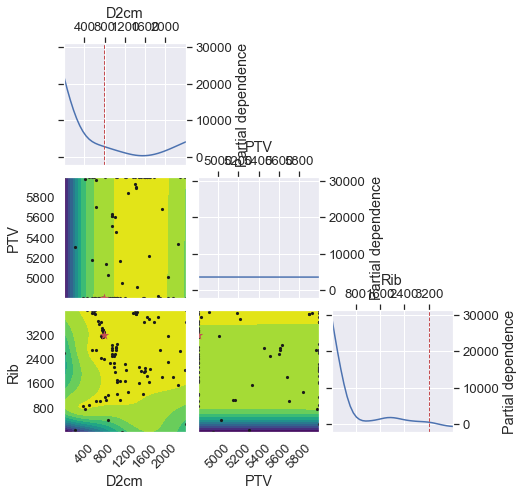

In [23]:
# Plot objective
plots.plot_objective(result.opt_result, dimensions=['D2cm', 'PTV', 'Rib']);

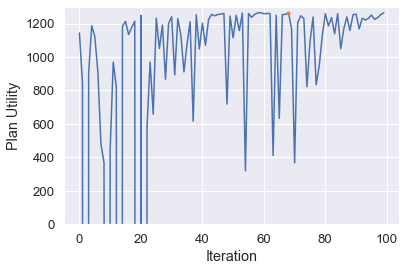

In [29]:
# Plot objective
plt.plot(-result.opt_result.func_vals)
plt.plot(idx_sol, -result.opt_result.fun, '.')
plt.xlabel('Iteration')
plt.ylabel('Plan Utility')
plt.ylim([0, 1300]);

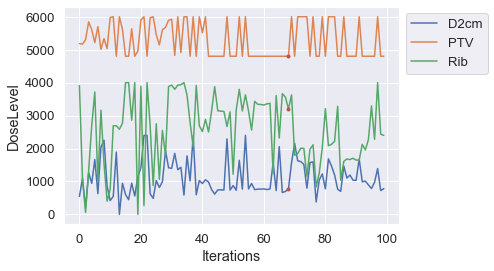

In [32]:
# Plot parameters
plt.plot(result.opt_result.x_iters);
plt.plot(idx_sol*np.ones(3), result.opt_result.x, '.')
plt.xlabel('Iterations')
plt.ylabel('DoseLevel')
plt.legend(['D2cm', 'PTV', 'Rib'], bbox_to_anchor=(1, 1));

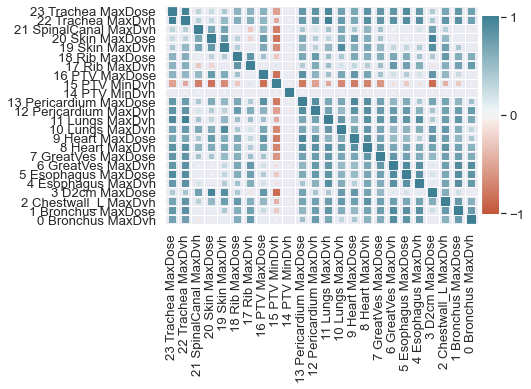

In [35]:
result.corrplot(size=50)

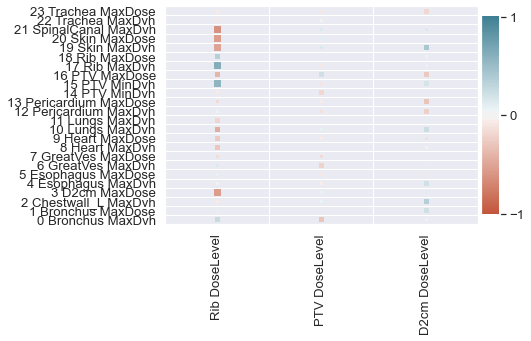

In [36]:
result.corrplot('pars', size=50)

In [37]:
x_iters = np.array(result.opt_result.x_iters)

(-1300.0, 0.0)

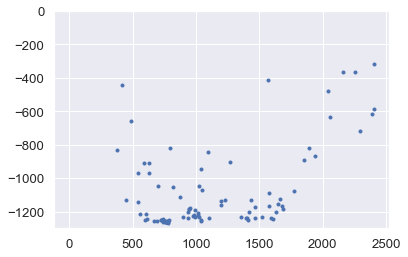

In [41]:
plt.plot(x_iters[:,0], result.opt_result.func_vals, '.')
plt.ylim([-1300, 0])

(-1300.0, 0.0)

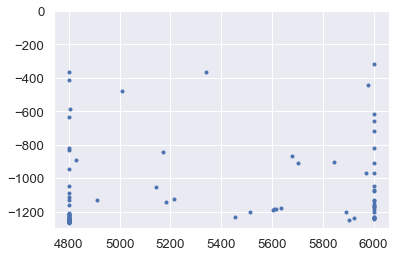

In [42]:
plt.plot(x_iters[:,1], result.opt_result.func_vals, '.')
plt.ylim([-1300, 0])

(-1300.0, 0.0)

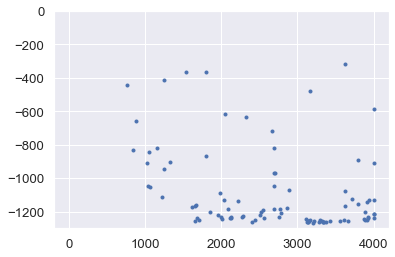

In [43]:
plt.plot(x_iters[:,2], result.opt_result.func_vals, '.')
plt.ylim([-1300, 0])

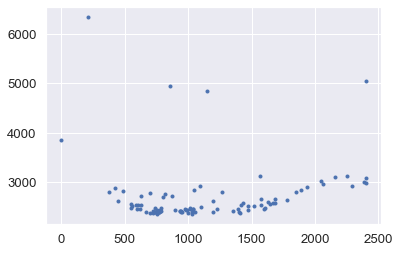

In [48]:
plt.plot(x_iters[:, 0], result.goal_dict[3], '.')

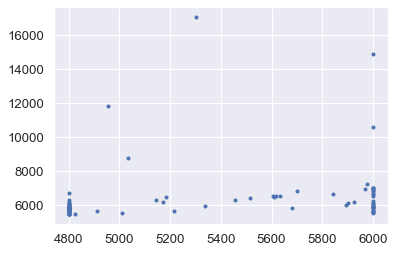

In [45]:
plt.plot(x_iters[:, 1], result.goal_dict[16], '.')

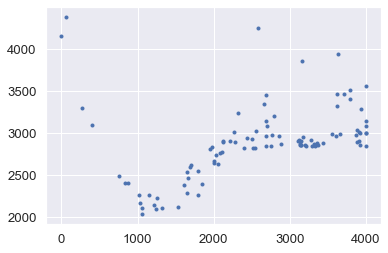

In [50]:
plt.plot(x_iters[:, 2], result.goal_dict[18], '.')

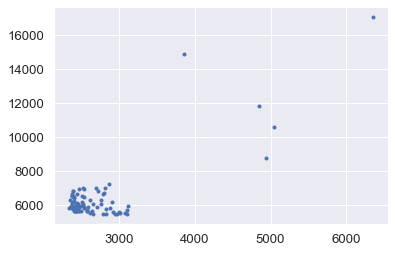

In [51]:
plt.plot(result.goal_dict[3], result.goal_dict[16], '.')

Text(0, 0.5, 'Rib MaxDose')

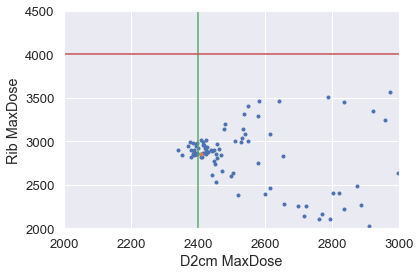

In [60]:
plt.plot(result.goal_dict[3], result.goal_dict[18], '.')
plt.plot(result.goal_dict[3][idx_sol], result.goal_dict[18][idx_sol], '.')
plt.plot([2400, 2400], [2000, 5000])
plt.plot([2000, 6000], [4000, 4000])
plt.xlim([2000, 3000])
plt.ylim([2000, 4500])
plt.xlabel('D2cm MaxDose')
plt.ylabel('Rib MaxDose')

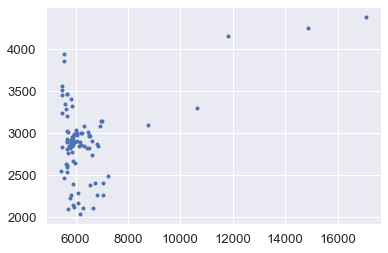

In [54]:
plt.plot(result.goal_dict[16], result.goal_dict[18], '.')